In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, f1_score

2024-12-30 10:03:04.861406: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-30 10:03:04.866616: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-30 10:03:04.880507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735527784.904800   10776 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735527784.910891   10776 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-30 10:03:04.930322: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
#loading the dataset
df=pd.read_csv("marketing_campaign.csv",delimiter=';')
#loading the dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

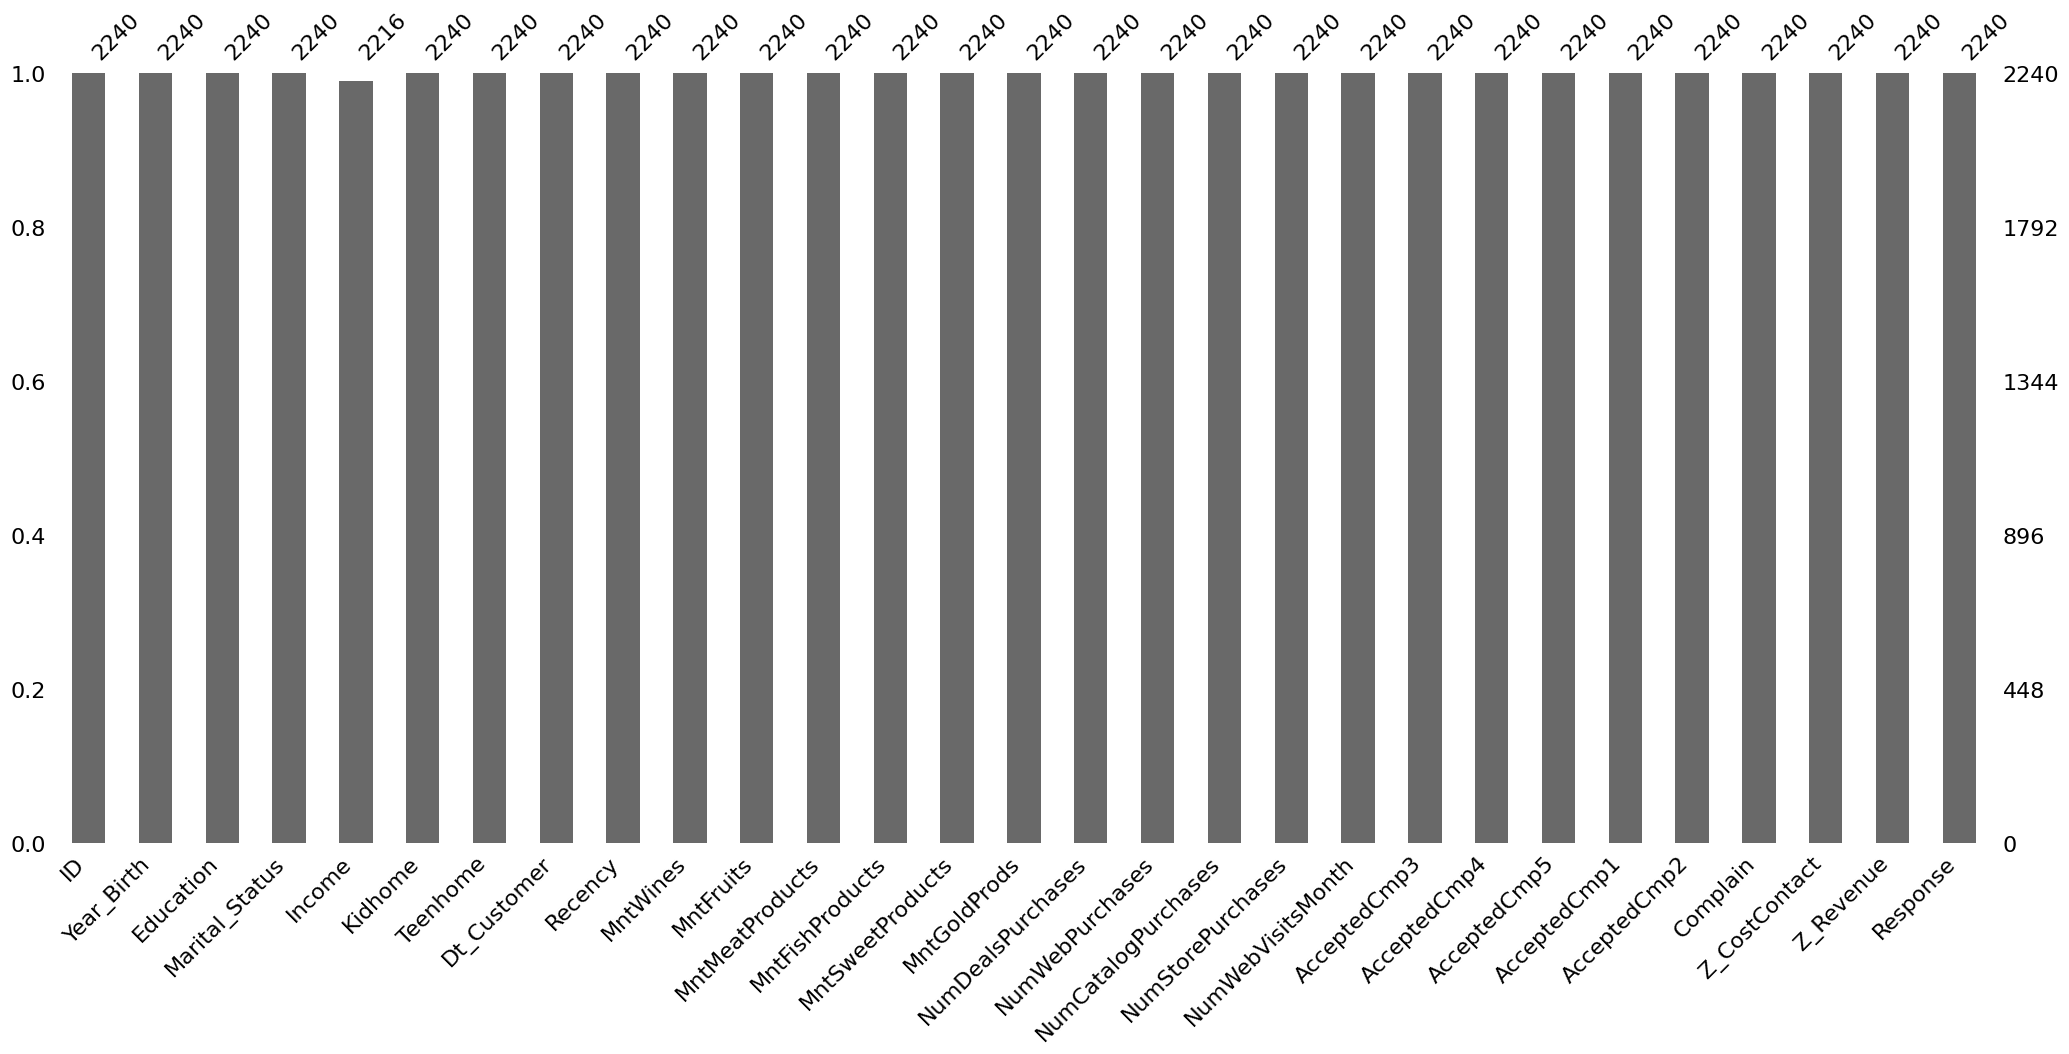

In [5]:
msno.bar(df)


<Axes: >

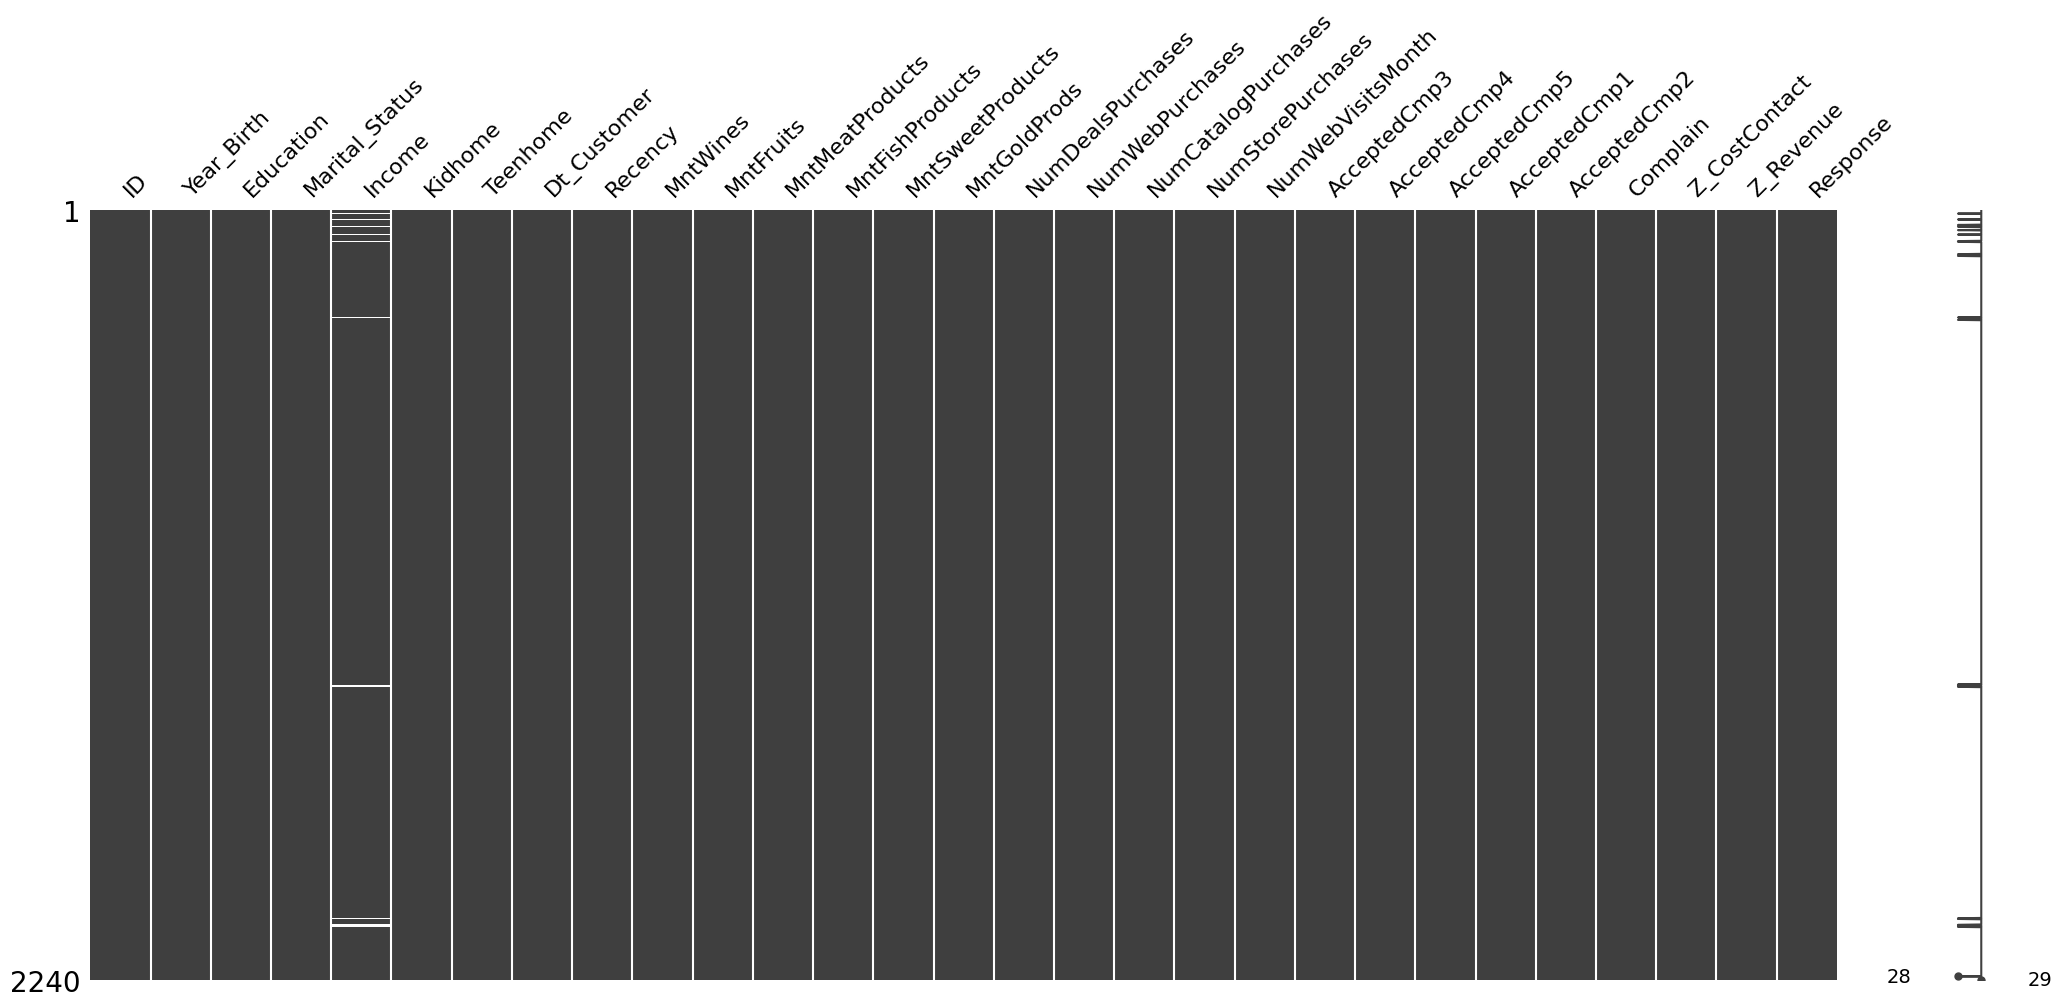

In [6]:
msno.matrix(df)

<Axes: >

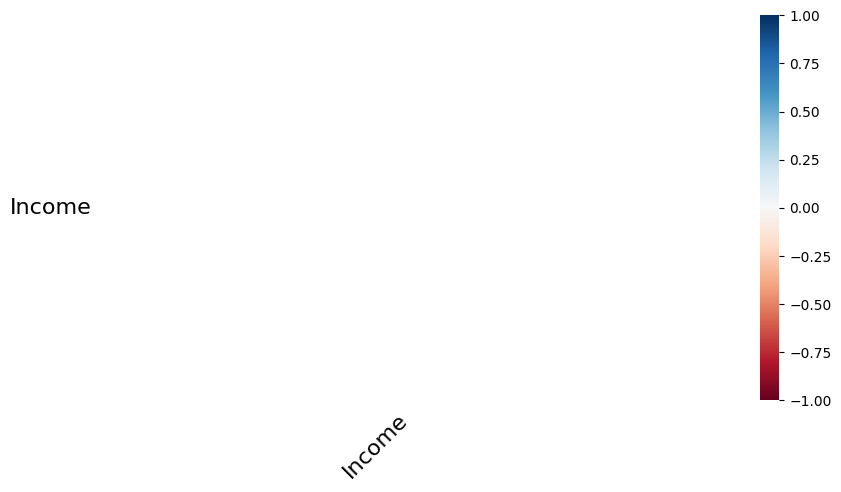

In [7]:
msno.heatmap(df,figsize=(10,5))

<Axes: >

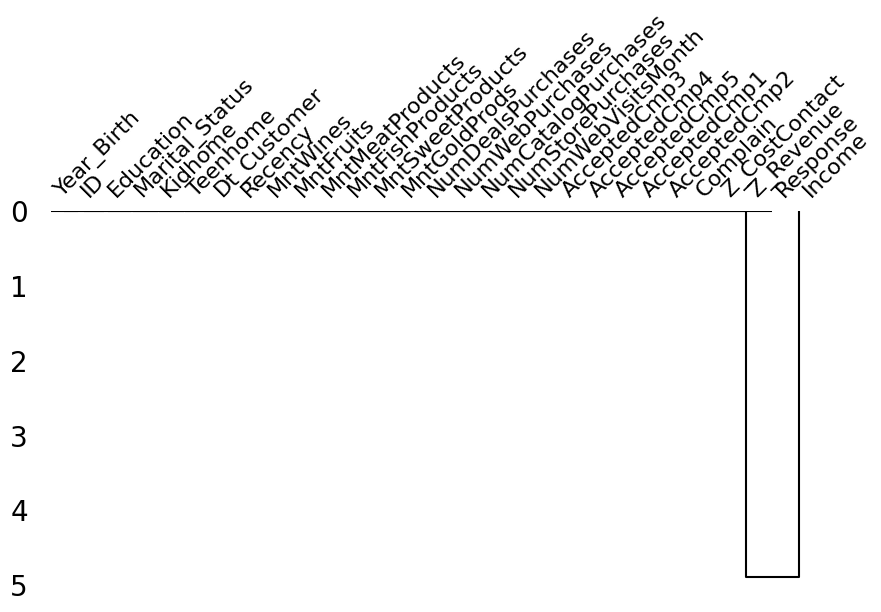

In [8]:
msno.dendrogram(df,figsize=(10,5))


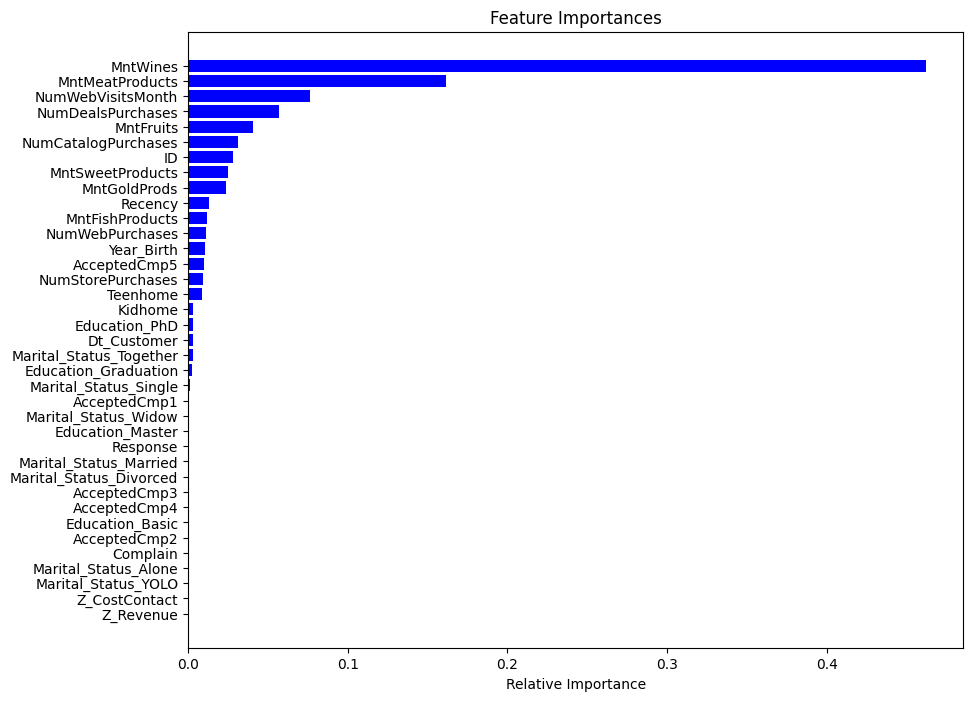

In [9]:

#Đặt biến mục tiêu (y) và các tính năng (X)
y = df['Income']  # chứa giá trị của cột mục tiêu ("Income").
X = df.drop(columns=['Income'])  # Xóa cột mục tiêu để chỉ giữ lại các tính năng

# Chuyển đổi 'Dt_Customer' sang năm
if 'Dt_Customer' in X.columns:
    X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer']).dt.year

## Chuyển đổi các tính năng phân loại thành số bằng cách sử dụng mã hóa one-hot
X = pd.get_dummies(X, drop_first=True)#pd.get_dummies(X): Chuyển đổi các cột phân loại thành các cột nhị phân

# Xử lý mọi giá trị còn thiếu và thay thế các giá trị trung bình vào, nhầm đảm bảo dữ liệu và tăng tính ổn định
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Khởi tạo và điều chỉnh mô hình hồi quy rừng ngẫu nhiên
model = RandomForestRegressor(random_state=1, max_depth=10)
#Huấn luyện mô hình:
model.fit(X, y)

# Trích xuất các tính năng và tầm quan trọng của chúng
features = X.columns
importances = model.feature_importances_ #trả về một mảng chứa độ quan trọng của từng đặc trưng nằm trong khoảng từ 0 đến 1.
indices = np.argsort(importances) #trả về các chỉ số sắp xếp của importances từ nhỏ đến lớn.

# Vẽ biểu đồ tầm quan trọng của các tính năng
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [10]:
# Loại bỏ các cột có hơn 90% giá trị bị thiếu
df = df.dropna(thresh=int(0.1 * len(df)), axis=1)


In [11]:
# Loại bỏ các cột mà tất cả các giá trị đều giống nhau
df = df.loc[:, (df.nunique() > 1)]


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Giả sử y là biến mục tiêu và X là DataFrame chứa các thuộc tính
model = RandomForestRegressor(random_state=1)
model.fit(X, y)

# Thiết lập ngưỡng cho độ quan trọng của thuộc tính
importance_threshold = 0.01

# Lọc các thuộc tính quan trọng dựa trên ngưỡng
important_features = X.columns[model.feature_importances_ > importance_threshold]
df = df[important_features]  # Giữ lại các thuộc tính quan trọng


In [15]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Khởi tạo và áp dụng PCA
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_pca = pca.fit_transform(X_scaled)

# In số lượng thành phần chính được giữ lại
print("Số lượng thành phần chính giữ lại:", X_pca.shape[1])

# Nếu muốn ghép lại thành một DataFrame với biến mục tiêu
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca = pd.concat([X_pca_df, y.reset_index(drop=True)], axis=1)


Số lượng thành phần chính giữ lại: 28


In [16]:
# Load the data from the CSV file
df = pd.read_csv('marketing_campaign.csv', sep=';')

# Preprocess the data
def preprocess_inputs(df):
    df = df.copy()

    # Check and drop 'ID' column if it exists
    if 'ID' in df.columns:
        df = df.drop('ID', axis=1)

    # Fill missing values in the 'Income' column
    if 'Income' in df.columns:
        df['Income'] = df['Income'].fillna(df['Income'].mean())

    # Process 'Dt_Customer' to extract year, month, and day
    if 'Dt_Customer' in df.columns:
        df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
        df['Year'] = df['Dt_Customer'].dt.year
        df['Month'] = df['Dt_Customer'].dt.month
        df['Day'] = df['Dt_Customer'].dt.day
        df = df.drop('Dt_Customer', axis=1)

    # Encode 'Education' and 'Marital_Status'
    EDUCATION_ENCODING = {'Graduation': 1, 'PhD': 3, 'Master': 2, 'Basic': 0, '2n Cycle': 4}
    df['Education'] = df['Education'].map(EDUCATION_ENCODING).fillna(df['Education'])

    MARITAL_ENCODING = {'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4,
                        'Alone': 5, 'Absurd': 6, 'YOLO': 7}
    df['Marital_Status'] = df['Marital_Status'].map(MARITAL_ENCODING).fillna(df['Marital_Status'])

    # Split features and target variable
    if 'Response' in df.columns:
        y = df['Response']
        X = df.drop('Response', axis=1)
    else:
        raise ValueError('Cột Response không tồn tại trong dữ liệu')

    return X, y

# Main function to preprocess, apply PCA, and split the data
def main():
    # Preprocess the data
    X, y = preprocess_inputs(df)

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, shuffle=True, random_state=123)

    # Convert the data back to DataFrame
    x_train_df = pd.DataFrame(x_train)
    x_test_df = pd.DataFrame(x_test)
    y_train_df = pd.Series(y_train)
    y_test_df = pd.Series(y_test)

    return x_train_df, x_test_df, y_train_df, y_test_df

# Run the main function and get the preprocessed data
x_train_df, x_test_df, y_train_df, y_test_df = main()
y_train_df

1584    1
203     1
1950    0
1812    0
925     0
       ..
1147    0
2154    0
1766    0
1122    0
1346    0
Name: Response, Length: 1568, dtype: int64

In [17]:
# Sử dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_df, y_train_df)
# Chia tập dữ liệu đã được cân bằng thành tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.7, random_state=42)
print(y_train.value_counts())
y_train

Response
1    402
0    398
Name: count, dtype: int64


1254    0
2209    1
2188    1
2624    1
1898    1
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: Response, Length: 800, dtype: int64

In [19]:
input_dim = x_train.shape[1] # Changed X_train to x_train as it's the output from train_test_split
encoding_dim = 128


input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(64, activation="relu")(encoder)
encoder = Dropout(0.2)(encoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(1, activation="sigmoid")(decoder)


autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])


history = autoencoder.fit(x_train, y_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, y_test)) # Changed X_train and X_test to x_train and x_test


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5046 - loss: 0.8397 - val_accuracy: 0.5332 - val_loss: 0.6865
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5423 - loss: 0.6912 - val_accuracy: 0.8480 - val_loss: 0.6179
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7512 - loss: 0.6205 - val_accuracy: 0.8613 - val_loss: 0.5693
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8346 - loss: 0.5647 - val_accuracy: 0.8624 - val_loss: 0.5159
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8734 - loss: 0.5111 - val_accuracy: 0.8913 - val_loss: 0.4532
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9107 - loss: 0.4364 - val_accuracy: 0.9368 - val_loss: 0.3801
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9404 - loss: 0.3736 - val_accuracy: 0.9684 - val_loss: 0.3021
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9672 - loss: 0.2973 - val_accuracy: 0.9829 - val_loss:

In [20]:
y_pred_nn = autoencoder.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("F1 Score:", f1_score(y_test, y_pred_nn))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      1.00      1.00       932

    accuracy                           1.00      1868
   macro avg       1.00      1.00      1.00      1868
weighted avg       1.00      1.00      1.00      1868

F1 Score: 0.9989258861439313
